In [1]:
# Import pkgs

In [2]:
# pip install imgaug --user

In [3]:
import tensorflow as tf
from tensorflow import keras
import segmentation_models as sm
User_name=u'沈易達'
from lib.cwdS import Cwd_path  #取得目前檔案的位置
from lib.json_name_path import Jsonname  
# from lib.json_name_path_h5 import *  
from lib.check_training import *  #How to difine

Segmentation Models: using `tf.keras` framework.


In [4]:
#pip install -U segmentation-models


In [5]:
# pip install h5py==2.10.0

In [6]:
# pip list


In [7]:
tf.compat.v1.disable_eager_execution()


In [8]:

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import cv2
import numpy as np
from lib.augmentation import get_training_augmentation, get_validation_augmentation, get_preprocessing
from lib.data_loader import Dataset, Dataloder
from lib.visualization import visualize
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
sm.set_framework('tf.keras')
sm.framework()
print("TF version: {}.".format(tf.__version__))
print("Keras version: {}.".format(keras.__version__))


TF version: 2.2.0.
Keras version: 2.3.0-tf.


In [9]:
from lib.parallel_model import*

In [10]:
from tensorflow.python.client import device_lib
def solve_cudnn_error():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)
            
solve_cudnn_error()
def get_gpus():
    info = device_lib.list_local_devices()
    return [x.physical_device_desc for x in info if x.device_type == "GPU"]

get_gpus()

1 Physical GPUs, 1 Logical GPUs


['device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:02:00.0, compute capability: 7.5']

In [11]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# sess = tf.Session(config=config)

In [12]:
# # os.chdir("D:/SurgeryAnalytics/AI_Cases/Dentistry0929/B_AI_training")
# # cwd = os.getcwd()
# print('change directory 配合使用使 os.getcwd() 可正確顯示Start')
# #os.chdir(os.path.dirname(os.path.abspath(__file__)))  #ipynb 不可用
# from pathlib import Path  #改為目前的資料夾引用物件
# os.chdir(Path.cwd())    #改為目前的資料夾*********
# cwd = os.getcwd()
# print(cwd)
# print('change directory 配合使用使 os.getcwd() 可正確顯示End')
# # print(cwd)
# AI_Path = cwd.split('/B_AI_training')[0]
# # print(AI_Path)
# AI_Data_jsonFile=AI_Path+'/A_Data_preprocessing/Dentistry_config.json'

# # if not os.path.isdir(trans_folder_path):
# #     os.mkdir(trans_folder_path)


In [13]:
User_name=u'沈易達'
# #cwd = os.getcwd()
# #取得目前檔案的位置
# cwd =str(Cwd_path()) #cwd=str(mazda)確保是字串格式
# # print("cwd : ",cwd)
# # print(cwd)
# AI_Path_ori = f"{cwd.split('/')[len(cwd.split('/'))-1]}" # 
# print('{0} == {1}'.format('AI_Path_ori :',AI_Path_ori))

# AI_Path0 = cwd.split(AI_Path_ori)[0]
# print('{0} == {1}'.format('AI_Path0 :',AI_Path0))
# AI_Path1=AI_Path0[:len(AI_Path0)-1]#長度減一
# print('{0} == {1}'.format('AI_Path1 長度減一 :',AI_Path1))
# _AI_Path=AI_Path1.split('\\')#use in windows 
# # print(_AI_Path)
# print('{0} == {1}'.format('_AI_Path windows :',_AI_Path))
# jsonname=_AI_Path[len(_AI_Path)-1].split('/') 
# print('{0} == {1}'.format('jsonname FolderName:',jsonname))
# #print(jsonname)
# jsonFileNEW = f"{cwd}/{jsonname[len(jsonname)-1]}_config.json"
# # print(jsonFileNEW)
# print('{0} == {1}'.format('jsonFileNEW :',jsonFileNEW ))
# AI_Data_jsonFile=AI_Path1 +'/B_AI_training/'+ f"{jsonname[len(jsonname)-1]}_config.json"
# print('{0} == {1}'.format('AI_Data_jsonFile :',AI_Data_jsonFile ))
# #1120116 路徑抓取防呆1120116 --- yita modify by charley 1120117 

# Set parameters

In [14]:
import json
# jsonFile = r"f:\SurgeryAnalytics/AI_Cases/Dentistry/1_Linknet_efficientnetb7_0_3/A_Data_preprocessing/Dentistry_config.json"  #讀取剛剛資料分析完輸出的JSION檔
# jsonFile = AI_Data_jsonFile  #讀取剛剛資料分析完輸出的JSION檔
jsonFile = Jsonname()
with open(jsonFile, 'r') as f:
    config = json.load(f)
config["user_name"] = User_name

AI_Data_jsonFile : == /media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/Dentistry_AI_ZERO_New_1120808_500_linknet_config.json


In [15]:
config

{'surgeryName': 'Dentistry',
 'label_folder_path': '/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/0_Data/0_ori',
 'trans_folder_path': '/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/0_Data/1_trans',
 'split_folder_path': '/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/0_Data/2_split',
 'correct_label': ['Alveolar_bone',
  'Caries',
  'Crown',
  'Dentin',
  'Enamel',
  'Implant',
  'Mandibular_alveolar_nerve',
  'Maxillary_sinus',
  'Periapical_lesion',
  'Post_and_core',
  'Pulp',
  'Restoration',
  'Root_canal_filling'],
 'detect_label_list': ['Alveolar_bone',
  'Caries',
  'Crown',
  'Dentin',
  'Enamel',
  'Implant',
  'Mandibular_alveolar_nerve',
  'Maxillary_sinus',
  'Periapical_lesion',
  'Post_and_core',
  'Pulp',
  'Restoration',
  'Root_canal_filling'],
 'Data_total_excel': '/media/

# 下面主要　建立　Model & Backbone & BATCH_SIZE

In [16]:
import copy
# data path
DATA_DIR = config["split_folder_path"]
x_train_dir = os.path.join(DATA_DIR, 'train', 'img')
y_train_dir = os.path.join(DATA_DIR, 'train', 'label')

x_valid_dir = os.path.join(DATA_DIR, 'val', 'img')
y_valid_dir = os.path.join(DATA_DIR, 'val', 'label')

# Label information
## data_loader must be change also.
CLASSES = copy.deepcopy(config["correct_label"])

CLASSES.insert(0, "background")


# hyperparameters
MODEL = 'Linknet' # 使用的model名稱 (Unet/Linknet/PSPNet/FPN)
BACKBONE = 'efficientnetb7' # resnet152 efficientnetb0 使用的backbone名稱 (efficientnetb4/efficientnetb5/resnet101/mobilenetv2/NASNetLarge/inceptionresnetv2/efficientnetb7...)
# BACKBONE models: ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'seresnet18', 'seresnet34', 'seresnet50', 'seresnet101', 
#                    'seresnet152', 'seresnext50', 'seresnext101', 'senet154', 'resnext50', 'resnext101', 'vgg16', 'vgg19', 
#                    'densenet121', 'densenet169', 'densenet201', 'inceptionresnetv2', 'inceptionv3', 
#                    'mobilenet', 'mobilenetv2', 'efficientnetb0', 'efficientnetb1', 'efficientnetb2', 'efficientnetb3', 'efficientnetb4', 'efficientnetb5', 'efficientnetb6', 'efficientnetb7']
data_height=384
data_width=384
# data_height=480
# data_width=640

if MODEL == 'PSPNet':
    data_height=384
    data_width=384
    tf.compat.v1.disable_eager_execution()


BATCH_SIZE = 2

LR = 0.0001 #0.0001
EPOCHS = 100 #40  100
n_classes = 1 if len(CLASSES) == 1 else (len(CLASSES) + 1)  # case for binary and multiclass segmentation
activation = 'sigmoid' if n_classes == 1 else 'softmax'
optim = keras.optimizers.Adam(LR)

preprocess_input = sm.get_preprocessing(BACKBONE)

# loss
# WEIGHT = np.array([0.01, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.01])
# WEIGHT = np.empty(0)
jaccard_loss = sm.losses.JaccardLoss()#(class_weights=WEIGHT)
dice_loss = sm.losses.DiceLoss()#class_weights=WEIGHT)    沒用到????
focal_loss = sm.losses.BinaryFocalLoss() if n_classes == 1 else sm.losses.CategoricalFocalLoss()
# categorical_crossentropy = sm.losses.CategoricalCELoss(class_weights=WEIGHT)
total_loss = (0.5 * jaccard_loss) + (1 * focal_loss)
# print(total_loss)
# metrics
metrics = [sm.metrics.IOUScore(threshold=0.5), # , class_indexes=[1]
           sm.metrics.Recall(threshold=0.5)] # , class_indexes=[1]]

# metrics = [sm.metrics.IOUScore(threshold=0.5), # , class_indexes=[1]
#            sm.metrics.Recall(threshold=0.5), # , class_indexes=[1]
#           "sparse_categorical_accuracy"]

In [17]:
# print(jaccard_loss)

In [18]:
#pip install -U albumentations

In [19]:
#pip install albumentations --user

# View data labeled

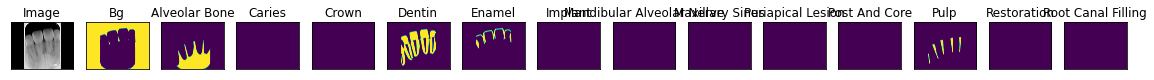

In [20]:
# Lets look at data we have
dataset = Dataset(x_train_dir, y_train_dir, classes=CLASSES)
image, mask = dataset[1] # get some sample

visualize(
    image=image, 
    bg=mask[..., 0].squeeze(),
    Alveolar_bone=mask[..., 1].squeeze(),
    Caries=mask[..., 2].squeeze(),
    Crown=mask[..., 3].squeeze(),
    Dentin=mask[..., 4].squeeze(),
    Enamel=mask[..., 5].squeeze(),
    Implant=mask[..., 6].squeeze(),
    Mandibular_alveolar_nerve=mask[..., 7].squeeze(),
    Maxillary_sinus=mask[..., 8].squeeze(),
    Periapical_lesion=mask[..., 9].squeeze(),
    Post_and_core=mask[..., 10].squeeze(),
    Pulp=mask[..., 11].squeeze(),
    Restoration=mask[..., 12].squeeze(),
    Root_canal_filling=mask[..., 13].squeeze()

)
# print(mask.shape)
# print(image.shape)

/home/ai/anaconda3/envs/py36tf/lib/python3.6/site-packages/albumentations/imgaug/transforms.py:261: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/home/ai/anaconda3/envs/py36tf/lib/python3.6/site-packages/albumentations/imgaug/transforms.py:384: FutureWarning: This IAAPerspective is deprecated. Please use Perspective instead
  warnings.warn("This IAAPerspective is deprecated. Please use Perspective instead", FutureWarning)
/home/ai/anaconda3/envs/py36tf/lib/python3.6/site-packages/albumentations/augmentations/transforms.py:1151: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,
/home/ai/anaconda3/envs/py36tf/lib/python3.6/site-packages/albumentations/imgaug/transforms.py:231: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use 

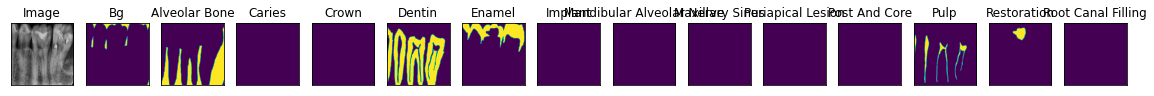

In [21]:
# Lets look at augmented data we have
dataset = Dataset(x_train_dir, y_train_dir, classes=CLASSES, augmentation=get_training_augmentation(data_height,data_width))
# augmentation 主要在進行 少量資料的複雜化 
image, mask = dataset[2] # get some sample

visualize(
    image=image, 
    bg=mask[..., 0].squeeze(),
    Alveolar_bone=mask[..., 1].squeeze(),
    Caries=mask[..., 2].squeeze(),
    Crown=mask[..., 3].squeeze(),
    Dentin=mask[..., 4].squeeze(),
    Enamel=mask[..., 5].squeeze(),
    Implant=mask[..., 6].squeeze(),
    Mandibular_alveolar_nerve=mask[..., 7].squeeze(),
    Maxillary_sinus=mask[..., 8].squeeze(),
    Periapical_lesion=mask[..., 9].squeeze(),
    Post_and_core=mask[..., 10].squeeze(),
    Pulp=mask[..., 11].squeeze(),
    Restoration=mask[..., 12].squeeze(),
    Root_canal_filling=mask[..., 13].squeeze()

)

# print(mask.shape)

In [22]:
#pip install -U albumentations --no-binary qudida,albumentations

In [23]:
#pip install -U albumentations[imgaug]
#pip install -U albumentations

# Model training

In [24]:
# Dataset for train images
train_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    classes=CLASSES, 
    augmentation=get_training_augmentation(data_height,data_width),
    preprocessing=get_preprocessing(preprocess_input),
)
# augmentation 主要在進行 少量資料的複雜化 

# Dataset for validation images
valid_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    classes=CLASSES, 
    augmentation=get_validation_augmentation(data_height,data_width),
    preprocessing=get_preprocessing(preprocess_input),
)

train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
# train_dataloader = Dataloder(train_dataset, batch_size=1, shuffle=True)
valid_dataloader = Dataloder(valid_dataset, batch_size=1, shuffle=False)
# print(train_dataloader.shap)
# check shapes for errors
assert train_dataloader[0][0].shape == (BATCH_SIZE, data_height, data_width, 3)
assert train_dataloader[0][1].shape == (BATCH_SIZE, data_height, data_width, n_classes)
# assert train_dataloader[0][0].shape == (1, data_height, data_width, 3)
# assert train_dataloader[0][1].shape == (1, data_height, data_width, n_classes)
assert valid_dataloader[0][0].shape == (1, data_height, data_width, 3)
assert valid_dataloader[0][1].shape == (1, data_height, data_width, n_classes)

In [25]:
def my_scheduler(epoch, lr):
    if epoch < 300:
        return lr
    else:
        return 0.00001 # lr * tf.math.exp(-0.1)

In [26]:
# class delete_save_model_path(keras.callbacks.Callback):
#     save_model_path = "/ckpt/"
    
#     import time
#     time.localtime()
#     train_time=time.strftime("%Y%m%d%H%M%S", time.localtime())

#     AI_Data_jsonFile='best_epoch.json'
  
#     #拆字
#     best_epochfile = "test0621" + train_time + ".h5"
#     print(save_model_path)
    
#     from lib.json_name_path_h5 import Jsonname_h5 
#     jsonFile_h5 = Jsonname_h5()
    
#     # jsonFile = r"f:\SurgeryAnalytics\AI_Cases\Dentistry\1_Linknet_efficientnetb7_0_3\A_Data_preprocessing\Dentistry_config.json" 
#     # 讀取剛剛資料分析完輸出的JASON檔
#     jsonFile = jsonFile_h5  #讀取剛剛資料分析完輸出的JASON檔
#     print(jsonFile)
    
#     with open(jsonFile, 'r') as f:      #抓舊的最佳值
#         config = json.load(f)
#          #     delbest_epoch= config["best_epoch"]  #抓舊的最佳值~檔案名暫存
#         config["best_epoch"] = best_epochfile
#     with open(jsonFile,"w") as f:#存新的最佳值
#         json.dump(config, f)

#         # try:#刪除舊的最佳值
#         #     # delfile=delbest_epoch
#         #     # os.remove(delfile)
#         #     print(delfile)
#         # except:
#         #     try:
#         #         #delfile=delbest_epoch
#         #         # os.remove(delfile)
#         #         print(delfile)
#         #     except:
#         #         pass

In [27]:
import time
time.localtime()
train_time=time.strftime("%Y%m%d%H%M%S", time.localtime())
#訓練資料H5存入的資料夾 save_ckpt_Folder  memo by charley



In [28]:
print(train_time) #測試用1110825

20230813005951


In [29]:
# GPU_COUNT = 1 # 同时使用3个GPU
# model = keras.applications.densenet.DenseNet201() # 比如使用DenseNet-201
# model = ParallelModel(model, GPU_COUNT)
# model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy', metrics = ['accuracy'])
# model.fit(X_train, y_train,
#               batch_size=batch_size*GPU_COUNT, 
#               epochs=nb_epoch, verbose=0, shuffle=True,
#               validation_data=(X_valid, y_valid))

# model.save_weights('/path/to/save/model.h5')

In [30]:
# print(valid_dataloader[46][1].shape)

In [31]:
CKPT_PATH = ""
exec('model = sm.' + MODEL +'(BACKBONE, classes=n_classes, activation=activation)')
# GPU_COUNT = 1 # 同时使用3个GPU   
# model = ParallelModel(model, GPU_COUNT)    
if CKPT_PATH != '':
    model.load_weights(CKPT_PATH)
model.compile(optim, total_loss, metrics)
# dirPath = os.getcwd()
# save_model_path = dirPath + "/ckpt/"+train_time
# if not os.path.isdir(save_model_path):
#     os.mkdir(save_model_path)
# callbacks = [
#     # monitor='val_iou_score', mode='max' # mode='min'
#     keras.callbacks.ModelCheckpoint(save_model_path + '/'+ MODEL+'_'+BACKBONE +'_n{epoch:02d}_{val_iou_score:.3f}_model.h5', save_weights_only=True, save_best_only=True, monitor='val_loss', mode='min'),
#     keras.callbacks.ReduceLROnPlateau(patience=12, verbose=1), # patience=12, min_lr=0.00001
#     # keras.callbacks.LearningRateScheduler(schedule=my_scheduler, verbose=1)
#     keras.callbacks.CSVLogger(MODEL+"_"+BACKBONE+'_model_adam.csv')
# ]

# history = model.fit_generator(
#     train_dataloader, 
#     steps_per_epoch=len(train_dataloader),
#     epochs=EPOCHS, 
#     callbacks=callbacks, 
#     validation_data=valid_dataloader, 
#     validation_steps=len(valid_dataloader),
# )



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [32]:
# import os
# import glob
# import tensorflow as tf
# from lib.cwdS import Cwd_path  #取得目前檔案的位置
# from tensorflow import keras
# from tensorflow.python.platform import tf_logging as logging
# from tensorflow.python.util.compat import collections_abc
# import collections
# class CSVLogger(Callback):
# path="";
class RRJJ(keras.callbacks.Callback):   
    def __init__(self, A,B):
        super(RRJJ, self).__init__()
        self.sep = B
        # self.filename = filename
        self.epochs=0
        self.append = B
        # self.writer = None
        # self.keys = None
        # self.append_header = True
        self.save_model_path=A #object.save_model_path
        # self._reset_batch_timing()
        # super(RJ, self).__init__()
        

    def on_train_begin(self, logs=None):
        if self.append:
            # if file_io.file_exists(self.filename):
            #     with open(self.filename, 'r' + self.file_flags) as f:
            #         self.append_header = not bool(len(f.readline()))
            mode = 'a'
        else:
            mode = 'w'
        # if not os.path.isdir(save_model_path):
        #     os.mkdir(save_model_path)
        # logs = dict([(k, logs[k]) if k in logs else (k, 'NA') for k in self.keys])
        logging.warning('on_train_begin') 
        if not os.path.isdir('on_train_begin'):
            os.mkdir('on_train_begin')
            
    def on_train_end(self, logs=None):
        logging.warning('on_train_end')        
        if not os.path.isdir('on_train_end'):
            os.mkdir('on_train_end')
            
    def on_epoch_end(self,epoch,logs=None):
        print(self.sep,self.save_model_path)
#         self.epochs += 1
#         epoch=self.epochs
#         logs = logs or {}
#         # logging.warning('on_epoch_begin')
#         print("on_epoch_begin_on_epoch_begin"+str(epoch))
#         if not os.path.isdir('on_epoch_begin'):
#             os.mkdir('on_epoch_begin')
#             # files = glob.glob("mydir/*.txt") # 獲取所有 ".txt" 檔案 self.save_model_path
#             files = glob.glob(self.save_model_path + "/*.h5") 
#             min_size = float("inf") # 設定一個無限大的最小值
#             min_file = None # 設定一個空的最小檔案
#             # for callback in self.callbacks:
#             #     callback.on_epoch_begin(epoch, logs)
#             # self._reset_batch_timing()
#             # import os
#             # import glob
#             for file in files:
#                 size = os.path.getsize(file) # 獲取每個檔案的大小
#     #           print(file, size) # 列印每個檔案的名稱和大小
#                 print("刪除最小檔案 ")
    
#             # if size < min_size: # 如果檔案的大小小於最小值
#             #    min_size = size # 更新最小值
#             #    min_file = file # 更新最小檔案
               
#         #         if min_file: # 如果有找到最小檔案
#         # #       print("The smallest file is", min_file, "with size", min_size) # 列印最小檔案的名稱和大小
#         # #       os.remove(min_file) # 刪除最小檔案
#         #             print("刪除最小檔案 "+ str(min_file))
#         #         else: # 如果沒有找到最小檔案
#         #             print("No files found") # 列印沒有找到任何檔案
        
        
        

#     # def _reset_batch_timing(self):
#     #     self._delta_t_batch = 0.
#     #     self._delta_ts = collections.defaultdict( lambda: collections.deque([], maxlen=self.queue_length))

In [33]:
dirPath = os.getcwd()
save_model_path = dirPath + "/ckpt/"+train_time
# print(save_model_path)
# from lib.json1 import RJ
if not os.path.isdir(save_model_path):
    os.mkdir(save_model_path)
callbacks = [

    # monitor='val_iou_score', mode='max' # mode='min'
    keras.callbacks.ModelCheckpoint(save_model_path + '/'+ MODEL+'_'+BACKBONE +'_n{epoch:02d}_{val_iou_score:.3f}_model.h5', save_weights_only=True, save_best_only=True, monitor='val_loss', mode='min'),
    keras.callbacks.ReduceLROnPlateau(patience=12, verbose=1), # patience=12, min_lr=0.00001
    # keras.callbacks.LearningRateScheduler(schedule=my_scheduler, verbose=1)
    keras.callbacks.CSVLogger(MODEL+"_"+BACKBONE+'_model_adam.csv'),
    # print("save_model_path"),  
    # %debug
    # delete_save_model_path()
    # ?RJ('epoch',save_model_path + '/'+ MODEL+'_'+BACKBONE)
    RJ(save_model_path) #How to call 
]

In [34]:
weight_saver = keras.callbacks.ModelCheckpoint(save_model_path + '/'+ MODEL+'_'+BACKBONE +'_n{epoch:02d}_{val_iou_score:.3f}_model.h5', save_weights_only=True, save_best_only=True, monitor='val_loss', mode='min')
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
CSVLogger=keras.callbacks.CSVLogger(MODEL+"_"+BACKBONE+'_model_adam.csv')
ReduceLROnPlateau=keras.callbacks.ReduceLROnPlateau(patience=12, verbose=1)
# delete_save_model_path()

In [35]:
# print(len(train_dataloader))
# print(len(valid_dataloader))
# history = model.fit_generator(
#     train_dataloader, 
#     steps_per_epoch=len(train_dataloader),
#     epochs=EPOCHS, 
#     callbacks=callbacks, 
#     validation_data=valid_dataloader, 
#     validation_steps=len(valid_dataloader)
# )
steps_per_epoch=len(train_dataloader)
# history = model.fit(train_dataloader,
#                  validation_data = valid_dataloader,
#                  epochs=EPOCHS,
#                  callbacks = [weight_saver, earlystop,CSVLogger,ReduceLROnPlateau])

history = model.fit(train_dataloader,
                 validation_data = valid_dataloader,
                 epochs=EPOCHS,
                 callbacks = callbacks)




[]
Epoch 1/100
228/228 [==============================] - 453s 2s/step - loss: 0.4829 - iou_score: 0.3721 - recall: 0.5100 - val_loss: 0.4282 - val_iou_score: 0.7199 - val_recall: 0.7532 - lr: 1.0000e-04
[('n01', '0.720')]
保留
/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/B_AI_training/ckpt/20230813005951/Linknet_efficientnetb7_n01_0.720_model.h5
Epoch 2/100
228/228 [==============================] - 100s 441ms/step - loss: 0.4311 - iou_score: 0.5994 - recall: 0.6381 - val_loss: 0.4085 - val_iou_score: 0.7597 - val_recall: 0.8028 - lr: 1.0000e-04
[('n02', '0.760'), ('n01', '0.720')]
保留
/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/B_AI_training/ckpt/20230813005951/Linknet_efficientnetb7_n01_0.720_model.h5
保留
/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/B_AI_training/ckpt/20230813005951/Linkn

In [36]:
#import os

In [37]:
print('change directory 配合使用使 os.getcwd() 可正確顯示Start')
# #os.chdir(os.path.dirname(os.path.abspath(__file__)))  #ipynb 不可用
# from pathlib import Path  #改為目前的資料夾引用物件
# os.chdir(Path.cwd())    #改為目前的資料夾*********
# cwd = os.getcwd()
# print(cwd)
print('change directory 配合使用使 os.getcwd() 可正確顯示End')
# save_model_path = dirPath + "/ckpt"
config["model"] = MODEL
config["BACKBONE"] = BACKBONE
config["num_classes"] = len(CLASSES)+1
config["save_ckpt_Folder"] = save_model_path
config["data_height"] = data_height
config["data_width"] = data_width
# with open("Dentistry_config.json","w") as f:
#     json.dump(config, f)

#呼叫方式:
AI_Data_jsonFile = Jsonname()
print(AI_Data_jsonFile )   #注意等等跑AI需要過來複製一下路徑
with open(AI_Data_jsonFile , 'w') as f:
     json.dump(config, f)
config

change directory 配合使用使 os.getcwd() 可正確顯示Start
change directory 配合使用使 os.getcwd() 可正確顯示End
AI_Data_jsonFile : == /media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/Dentistry_AI_ZERO_New_1120808_500_linknet_config.json
/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/Dentistry_AI_ZERO_New_1120808_500_linknet_config.json


{'surgeryName': 'Dentistry',
 'label_folder_path': '/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/0_Data/0_ori',
 'trans_folder_path': '/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/0_Data/1_trans',
 'split_folder_path': '/media/ai/disk1/notebook/jupyter_work/test1/SurgeryAnalytics/AI_Cases/Dentistry_AI_ZERO_New_1120808_500_linknet/0_Data/2_split',
 'correct_label': ['Alveolar_bone',
  'Caries',
  'Crown',
  'Dentin',
  'Enamel',
  'Implant',
  'Mandibular_alveolar_nerve',
  'Maxillary_sinus',
  'Periapical_lesion',
  'Post_and_core',
  'Pulp',
  'Restoration',
  'Root_canal_filling'],
 'detect_label_list': ['Alveolar_bone',
  'Caries',
  'Crown',
  'Dentin',
  'Enamel',
  'Implant',
  'Mandibular_alveolar_nerve',
  'Maxillary_sinus',
  'Periapical_lesion',
  'Post_and_core',
  'Pulp',
  'Restoration',
  'Root_canal_filling'],
 'Data_total_excel': '/media/

In [38]:
# config

In [39]:
# steps_per_epoch=len(x_train)/batch_size      这个参数实际上就是指定了每一轮epoch需要执行多少steps，也就是多少steps，才能认为一轮epoch结束。 

In [40]:
#pip install albumentations --user

In [41]:
# pip list

In [42]:
# model.save("my_model.h5")

In [43]:
# import numpy
# OtherData = ['編號類別對應表', 'ClassName','色碼']
# numpy.size(OtherData)

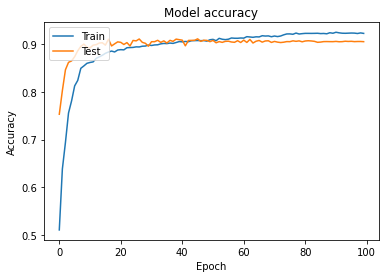

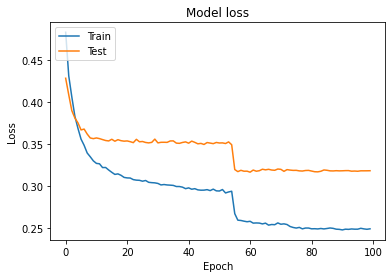

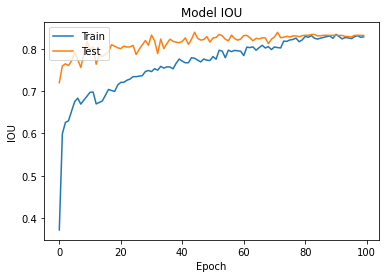

In [44]:
import matplotlib.pyplot as plt

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# 繪製訓練 & 驗證的準確率值
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(    save_model_path + '_'+ MODEL+'_'+BACKBONE +'_accuracy_curve.png'    )
plt.show()

# 繪製訓練 & 驗證的損失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(save_model_path + '_'+ MODEL+'_'+BACKBONE +'_loss_curve.png')

plt.show()
# iou
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model IOU')
plt.ylabel('IOU')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(save_model_path + '_'+ MODEL+'_'+BACKBONE +'_iou_curve.png')
plt.show()